# Exploratory Data Analysis

Structure:
1. Labels
2. Cheaters vs non-cheaters

Notes: Since all of the values here represents the player performance, missing
values are filled with 0 as explained in the cleaning step.

In [39]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from csgo_cheater_detection.config.config import data_path, image_path
from csgo_cheater_detection.config.visuals import *

In [40]:
# load data
df = pd.read_csv(f'{data_path}\\csgo_cheater_data_8_30_20_full.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14127 entries, 0 to 14126
Columns: 190 entries, total_planted_bombs to total_headshots_per_round
dtypes: bool(1), float64(187), int64(2)
memory usage: 20.4 MB


## Part 1: Labels

There are two important points about the labels:
1. As with most other fraud detection dataset, our data is also imbalanced. The data
consists of 83% non-cheater and 17% cheater. Many techniques can be used to
remedy the imbalance like sampling methods, class weights, initial bias...In part 3 and 4
we will apply these techniques and see how it can improve the prediction drastically.
2. Steam APIs give a 1 if a user get banned at any game which mean a user does not
necessarily cheat at CS:GO. Multiple criteria are used to make sure the label \
is correct (see collection process). Moreover, the data comes from the websites
that check ban status of a player which means the data is skewed toward cheater
more than usual. Nevertheless, at 17%, the cheater percentage is quite optimistic.

In [41]:
df.label.value_counts(normalize=True)

False    0.825441
True     0.174559
Name: label, dtype: float64

## Part 2: Cheaters vs non-cheaters

Interesting findings:
1. Cheaters has a better accuracy in bizon and a much worse accuracy in AWP.
AWP is a very high skill floor weapon while bizon has a low skill floor.
2. Cheaters behave like non-cheaters. Snappy combat makes it hard to distinguish.

In [42]:
# remove columns where win ratio is greater than 1
df = df[df.win_ratio < 1]

# cheater dataset
df_cheater = df[df.label==True]
df_non_cheater = df[df.label==False]

In [43]:
# accuracy of cheaters
accuracy_cols = [col for col in df_cheater.columns if 'accuracy' in col]
for col in accuracy_cols:
    print(
        f'{col}  \
        {df_cheater[col].mean() - df_non_cheater[col].mean()}'
    )

total_accuracy          0.0006925028852778625
accuracy_deagle          0.0036190152026972233
accuracy_glock          -0.0002164198813533469
accuracy_elite          -0.0008104066021587808
accuracy_fiveseven          0.005325738714220651
accuracy_awp          -0.5473115521739573
accuracy_ak47          0.0019140753050459758
accuracy_aug          -0.0025014932001490298
accuracy_famas          -0.00044295932604696
accuracy_g3sg1          0.0035866736372713315
accuracy_p90          -0.0007125038786789661
accuracy_mac10          0.00040968684201517225
accuracy_ump45          -0.001582094719617455
accuracy_xm1014          -0.006951647747913292
accuracy_m249          0.0023175017647572294
accuracy_hkp2000          0.00010562916331011141
accuracy_p250          0.0015964919683154333
accuracy_sg556          -0.0028497566203036784
accuracy_scar20          0.0037852908436978583
accuracy_ssg08          0.007973362390185312
accuracy_mp7          -0.0010158410613334279
accuracy_mp9          -0.00436073

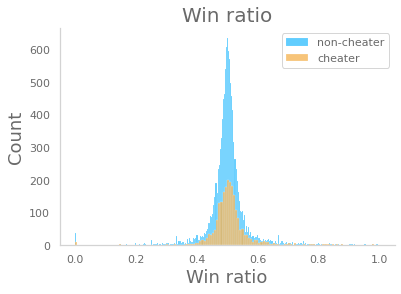

In [61]:
# difference between win ratio
sns.histplot(df_non_cheater['win_ratio'], label='non-cheater', color='#2CBDFE')
sns.histplot(df_cheater['win_ratio'], label='cheater', color='#F5B14C')
plt.legend(loc='upper right')
plt.title('Win ratio')
plt.xlabel('Win ratio')
plt.savefig(f'{image_path}\\eda_image\\win_ratio.png')

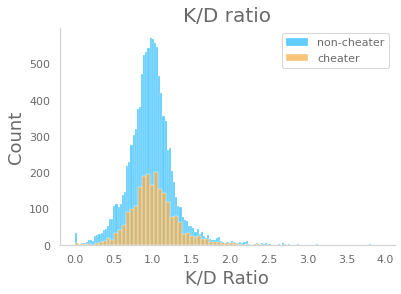

In [67]:
# difference between win ratio
sns.histplot(df_non_cheater[df_non_cheater.kill_to_death_ratio < 4]['kill_to_death_ratio'], label='non-cheater', color='#2CBDFE')
sns.histplot(df_cheater[df_cheater.kill_to_death_ratio < 4]['kill_to_death_ratio'], label='cheater', color='#F5B14C')
plt.legend(loc='upper right')
plt.title('K/D ratio')
plt.xlabel('K/D Ratio')
plt.savefig(f'{image_path}\\eda_image\\kd_ratio.png')

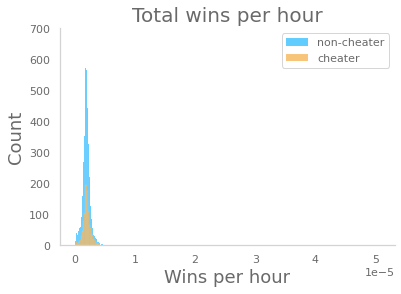

In [71]:
# difference between win ratio
sns.histplot(df_non_cheater[df_non_cheater.total_wins_per_hour < 1]['total_wins_per_hour'], label='non-cheater', color='#2CBDFE')
sns.histplot(df_cheater[df_cheater.total_wins_per_hour < 1]['total_wins_per_hour'], label='cheater', color='#F5B14C')
plt.legend(loc='upper right')
plt.title('Total wins per hour')
plt.xlabel('Wins per hour')
plt.savefig(f'{image_path}\\eda_image\\win_per_hour.png')

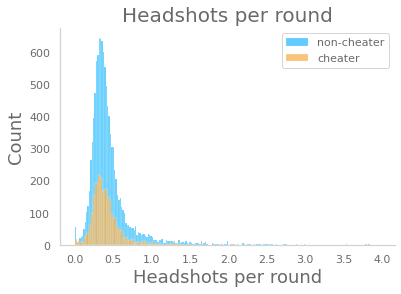

In [76]:
# difference between win ratio
sns.histplot(df_non_cheater[df_non_cheater.total_headshots_per_round < 4]['total_headshots_per_round'], label='non-cheater', color='#2CBDFE')
sns.histplot(df_cheater[df_cheater.total_headshots_per_round < 4]['total_headshots_per_round'], label='cheater', color='#F5B14C')
plt.legend(loc='upper right')
plt.title('Headshots per round')
plt.xlabel('Headshots per round')
plt.savefig(f'{image_path}\\eda_image\\headshots_per_round.png')

## Probable testings

In [74]:
[col for col in df_cheater.columns if 'headshots' in col]

['total_headshots_per_round']